### Data Cleaning and Preparation
- Problem Statement: Analyzing Customer Churn in a Telecommunications Company
- Dataset: "Telecom_Customer_Churn.csv"
- Description: The dataset contains information about customers of a telecommunications
company and whether they have churned (i.e., discontinued their services). The dataset
includes various attributes of the customers, such as their demographics, usage patterns, and
account information. 
- The goal is to perform data cleaning and preparation to gain insights
into the factors that contribute to customer churn.
#### Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,
and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to
predicting customer churn.
9. Normalize or scale the data if necessary
10. Split the dataset into training and testing sets for further analysis.
11. Export the cleaned dataset for future analysis or modeling.

In [1]:
# Import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telecom-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# statistics of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [50]:
# Inference:

# Senior citizen is actually categorical hence the 25%-50%-75% distribution is not proper
# We can also conclude that 75% of people have tenure.
# Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month

Text(0.5, 1.0, 'count of Target Variable per Category')

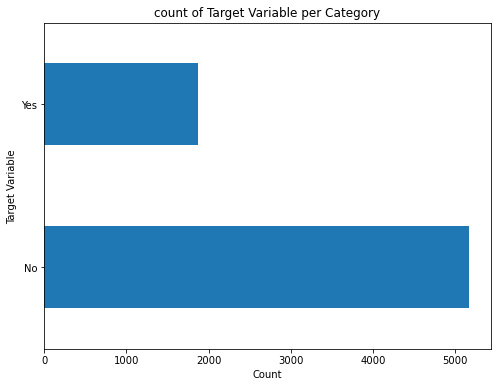

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("count of Target Variable per Category")

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
# dataset is not balanced at all i.e. Yes is 27 around and No is 73 around

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [55]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# totalcharges is of object type convert it to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# Check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# handling missing values
# totalcharges column has missing values which are very less drop them
df.dropna(how = 'any', inplace=True)

In [15]:
df['TotalCharges'].isnull().sum()

0

In [65]:
# duplicate records
df.duplicated().sum()

0

In [14]:
# Check for unique values in object-type columns to find inconsistencies such as spelling variations.
categorical_columns = df.select_dtypes(include=['object']).columns
# categorical_columns

In [13]:
# We'll also check the unique values for columns that have a limited set of expected values.
# For example, 'PhoneService', 'MultipleLines', 'InternetService', etc. could have standardized options.
unique_values = {column: df[column].unique() for column in categorical_columns}
# unique_values

In [15]:
# Converting 'SeniorCitizen' to a categorical type since it represents a binary attribute.
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [18]:
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

In [19]:
# # Now, let's identify outliers in numerical columns. We can use the IQR method for this.
# numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# outliers = {}

# for column in numerical_columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     outlier_condition = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
#     outliers[column] = df[outlier_condition]

# # Review the unique values for potential inconsistencies and the outliers.
# # unique_values, outliers


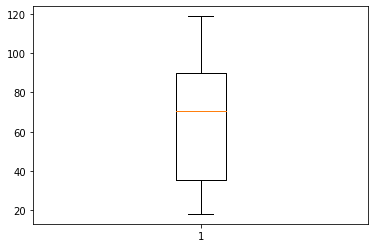

In [18]:
plt.boxplot(df['MonthlyCharges'])
plt.show()

In [19]:
# identify and handle outliers
# Identify outliers in 'MonthlyCharges' using z-scores and remove them
from scipy import stats

z_scores = stats.zscore(df['MonthlyCharges'])
df = df[(z_scores < 3)]

# You can apply a similar process for 'tenure'

In [21]:
df['MonthlyCharges'].max()

118.75

In [22]:
# feature engineering
# Create a new feature for the total amount spent by a customer
df['TotalAmountSpent'] = df['MonthlyCharges'] * df['tenure']

In [23]:
# # Normalize or scale the data if necessary:

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical_columns = ['MonthlyCharges', 'tenure', 'TotalAmountSpent']
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [24]:
# split data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Save the cleaned dataset to a new CSV file
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)

In [26]:
X_train.shape

(5625, 21)

In [27]:
X_test.shape

(1407, 21)

In [29]:
y_train.shape

(5625,)

In [31]:
y_test.shape

(1407,)